In [22]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

In [23]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import classification_report



# Quiz

1) redwine.csv 파일을 이용하여 데이타프레임을 생성하여라 

2) 피처별로 전처리를 진행하여라. (결측값, 인코딩, 원핫인코딩등) 

3) 학습 데이타셋과 테스트 데이타셋으로 분리시키고 모델을 생성한 후 
   머신러닝 예측 모델을 수립하고 학습하여라 


```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                        random_state = 156, stratify=y)
model_dt = DecisionTreeClassifier(random_state=11)

```

4) plot_tree() 를 이용하여 결정트리 모델을 시각화하여라 

5) 오차행렬, 재현율, 정밀도, 정확도, F1 Score 등의 평가지표를 출력하여라 

6) 아래의 소스를 참조하여 그리드서치를 적용시켜 최적의 하이퍼파라미터 예측 모델을 생성하여라. 

model_dt = DecisionTreeClassifier(random_state=11)

parameters = {'max_depth':[2,3,5, 7, 8, 10] }

model_dt_grid = GridSearchCV(model_dt , param_grid=parameters , scoring='accuracy' , cv=5)

7) 최적의 하이퍼파라미터로 모델을 생성하고 다시 학습시킨 후 평가지표를 확인하여라 

8) 가장 중요도가 높은 피처 3개는 무엇인가?

9) 7의 모델과  plot_tree() 를 이용하여 결정트리 모델을 시각화하여라 

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# 2) 결측값이 있는지 확인하여라. 
df_wine = pd.read_csv('data/redwine.csv')

In [27]:
df_wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [28]:
df_wine.isnull().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

In [29]:
df_wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [30]:
df_wine.dtypes

alcohol    float64
sugar      float64
pH         float64
class      float64
dtype: object

In [31]:
# 스케일링하지 않고 실제값 이용 
X = df_wine.loc[:, 'alcohol':'pH']
y = df_wine['class']

In [32]:
# 훈련세트와 테스트세트로 분리 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                        random_state = 156, stratify=y)
X_train.shape, X_test.shape

((5197, 3), (1300, 3))

In [33]:
model_dt = DecisionTreeClassifier(random_state=11)

model_dt.fit(X_train , y_train)

DecisionTreeClassifier(random_state=11)

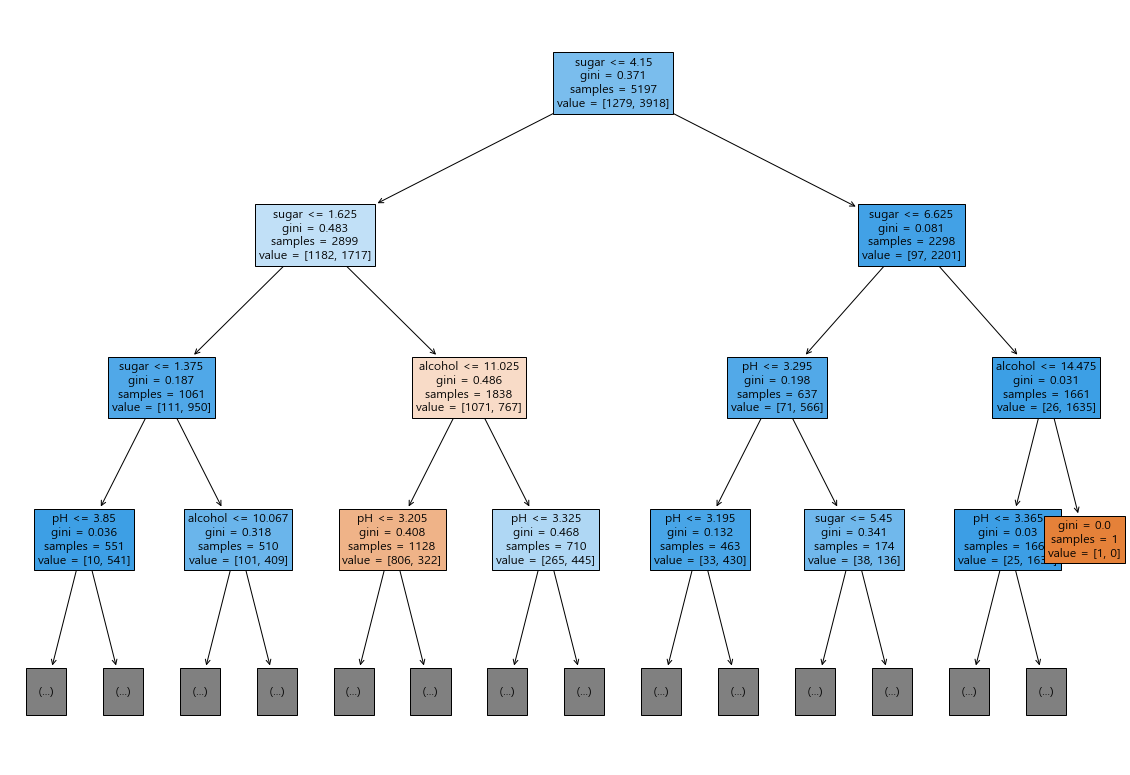

In [12]:
# 4) plot_tree() 를 이용하여 결정트리 모델을 시각화하여라 

from sklearn.tree import plot_tree
plt.figure(figsize=(20,14))

plot_tree(model_dt, max_depth=3, filled=True, feature_names=X.columns, fontsize=12)
# plot_tree(model_dt, max_depth=3, filled=True,  fontsize=10)
plt.show()

In [13]:
# 5) 오차행렬, 재현율, 정밀도, 정확도, F1 Score 등의 평가지표를 출력하여라 

In [34]:

print(classification_report(y_test, model_dt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       320
         1.0       0.92      0.91      0.92       980

    accuracy                           0.88      1300
   macro avg       0.83      0.84      0.83      1300
weighted avg       0.88      0.88      0.88      1300



In [35]:
# 6) 아래의 소스를 참조하여 그리드서치를 적용시켜 최적의 하이퍼파라미터 예측 모델을 생성하여라. 

model_dt = DecisionTreeClassifier(random_state=11)

parameters = {'max_depth':[2,3,5,10] }

grid_cv = GridSearchCV(model_dt , param_grid=parameters , scoring='accuracy' , cv=5)

In [36]:
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치:0.8632
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 5}


In [17]:
# 7) 최적의 하이퍼파라미터로 모델을 생성하고 다시 학습시킨 후 평가지표를 확인하여라 

In [37]:
# 최적 하이퍼 파라미터: {'max_depth': 5} 로 추정되는 모델 다시 생성 
model_dt2 = DecisionTreeClassifier(max_depth=5, random_state=11)
model_dt2.fit(X_train , y_train)

print("f1_score:", f1_score(y_test , model_dt2.predict(X_test)))
print()
print(classification_report(y_test, model_dt2.predict(X_test)))

f1_score: 0.9056214543579165

              precision    recall  f1-score   support

         0.0       0.70      0.75      0.72       320
         1.0       0.92      0.90      0.91       980

    accuracy                           0.86      1300
   macro avg       0.81      0.82      0.81      1300
weighted avg       0.86      0.86      0.86      1300



[0.13941758 0.73263085 0.12795158]

alcohol : 0.139
sugar : 0.733
pH : 0.128



<AxesSubplot:>

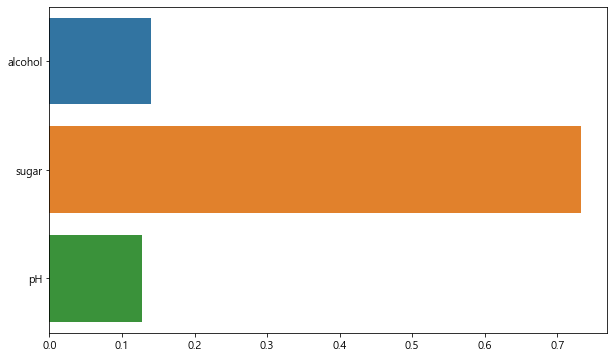

In [19]:
# 8) 가장 중요도가 높은 피처는 무엇인가?
print(model_dt2.feature_importances_)
print()

for name, value in zip(X.columns , model_dt2.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
print()

# 피처 중요도 시각화 
sns.barplot(x=model_dt2.feature_importances_ , y=X.columns)

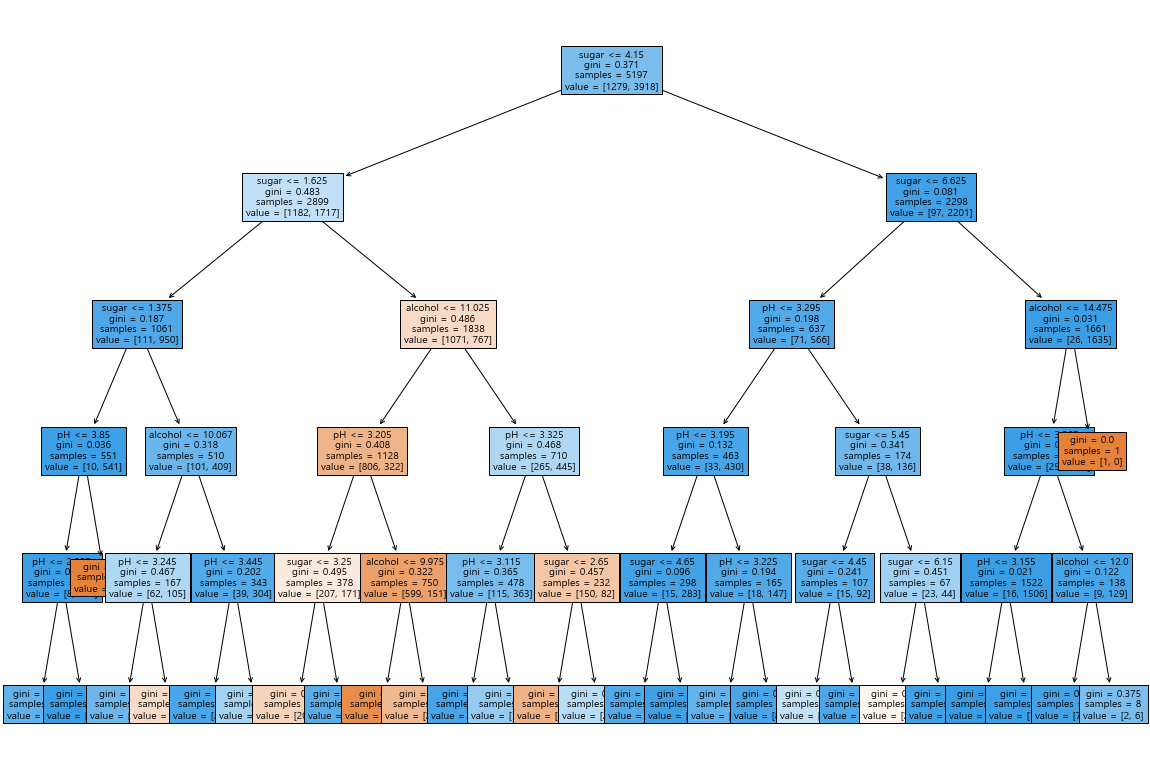

In [20]:
plt.figure(figsize=(20,14))
plot_tree(model_dt2, max_depth=5, filled=True, feature_names=X.columns, fontsize=10)
plt.show()